In [194]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [195]:
df = pd.read_csv("Advertising.csv")

In [196]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [197]:
df["TV"] = scale(df.TV)
df["Radio"] = scale(df.Radio)
df["Newspaper"] = scale(df.Newspaper)
df["Sales"] = scale(df.Sales)

In [198]:
f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(df.TV, df.Sales)

In [199]:
# df.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.221245e-16,-4.529710e-16,2.220446e-16,-2.975398e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,-2.567133e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,-7.836771e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,1.649697e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01,7.436442e-01
max,1.744029e+00,1.778300e+00,3.841171e+00,2.251992e+00


In [200]:
np_X_train = f_X_train.to_numpy()
np_y_train = f_y_train.to_numpy()
np_X_test = f_X_test.to_numpy()
np_y_test = f_y_test.to_numpy()

In [201]:
#add new dimension of size 1 --> shape (422,1) 
X_train = np_X_train[:,np.newaxis]
y_train = np_y_train[:,np.newaxis]
X_test = np_X_test[:,np.newaxis]
y_test = np_y_test[:,np.newaxis]

In [208]:
regr = linear_model.LinearRegression(fit_intercept = True)

regr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [209]:
# Make predictions using the testing set
y_pred = regr.predict(y_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Interecept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination / R2: %.2f" % r2_score(y_test, y_pred))




# R2 value of 47% = 47% of the variance can be explained by the model.
#Variance = measure of spread compared to mean
# is 47% a good metric?


Coefficients: 
 [[0.87713811]]
Interecept: 
 0.0
Mean squared error: 0.02
Root Mean squared error: 0.13
Coefficient of determination / R2: 0.98


C:\Users\Tanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


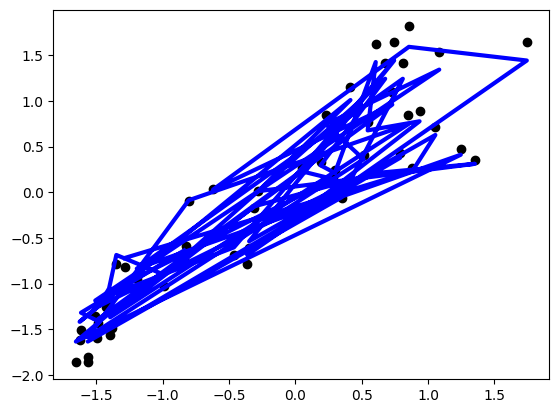

In [210]:
# Plot outputs
plt.scatter(X_test, y_test, color="black") #plot xy test set
plt.plot(X_test, y_pred, color="blue", linewidth=3) #plot Xtest and ypredicted

plt.xticks()
plt.yticks()

plt.show()